In [1]:
# Import the necessary libararies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
import re
import os
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 500)


In [2]:
####################### Define Global Variables ##################################

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

Local_Dir = r"C:\DS_Learning\Data_Science_IITB\EDA\GDP_Assignment\GDP_Part_1A"

# Store the name of the file in a variable. The file contanins State-wise Gross Domestic Product (GDP) at current price on yearly basis.
# The variable must be updated, if a different version of file being used


# Attention :- The name of the file for IA, avalable at data.gov.in, is not meaningful. 
#                Hence, I have renamed it to "State_Wise_GDP.csv". Please update the variable GDP_File_1A accordingly.
               


GDP_File_1A = r"\State_Wise_GDP.csv"
SWGDP_Dataset = str(Local_Dir + GDP_File_1A)

#Create the dataframe df
df = pd.read_csv(SWGDP_Dataset, index_col = None) 

# Filter out the rows, that are not required
#df = df[(df['Items  Description'] == "(% Growth over previous year)")]

# Delete the columns(Union Territaries), which are not required 
ut_list =  ['Puducherry', 'Delhi', 'Chandigarh','Andaman & Nicobar Islands', 'All_India GDP']
df = df.drop(ut_list, axis =1)

# Transpose the States into a single column to ease the calculation
df = df.melt(id_vars = ['Items  Description', 'Duration'], var_name = 'State', value_name = 'Growth Value')


In [3]:
# Remove the rows(years not in 2013-14, 2014-15 and 2015-16), which are not required 
year_list = ['2013-14', '2014-15', '2015-16']
df1 = df[(df.Duration.isin(year_list)) & (df['Items  Description'] == "(% Growth over previous year)")]

In [4]:
#Display the GDP of the states in the descending order
print("\n###################################################################################\n")

print("\n\tThe Average GDP of the states from 2013-14 to 2015-16 in descending order..\n")

print("\n###################################################################################\n")

#round(df.pivot_table(values = 'Percent Growth' , index =('State'), aggfunc = 'mean'),2).sort_values(by = 'Percent Growth', ascending = False)

#df1 = round(df1.pivot_table(values = 'Percent Growth' , index ='Duration', columns = 'State', aggfunc = 'mean'),2).sort_values(by = 'Percent Growth', ascending = False)

df1 = (round(df1.groupby('State')['Growth Value'].mean(),2)).to_frame()

# Reset the index of the Dataframe DF1
df1.reset_index(inplace = True)

# Sort the Dataframe in the descending order of the Average growth of the states
df1.sort_values('Growth Value', ascending = False, inplace = True)
df1



###################################################################################


	The Average GDP of the states from 2013-14 to 2015-16 in descending order..


###################################################################################



,State,Growth Value
17,Mizoram,17.70
25,Tripura,17.03
18,Nagaland,16.42
15,Manipur,14.61
1,Arunachal Pradesh,14.41
11,Karnataka,14.12
0,Andhra Pradesh,14.03
4,Chhattisgarh,13.70
3,Bihar,13.60
24,Telangana,12.76


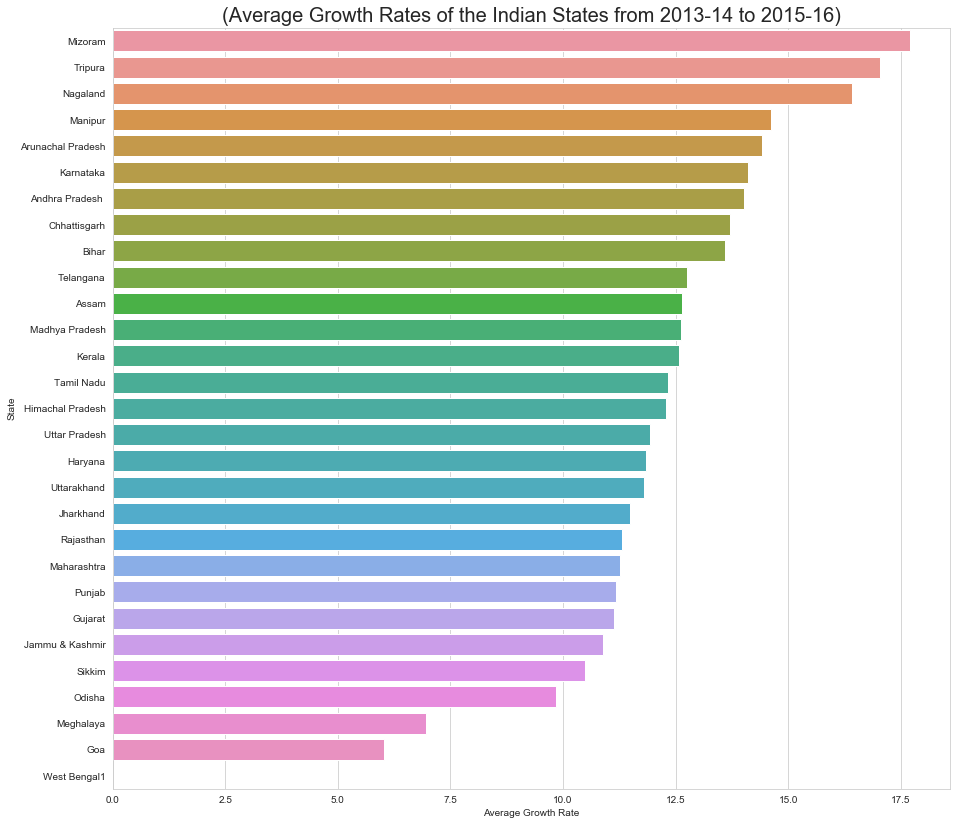

In [5]:
# Plot a graph to show the average growth rates of the Indian states
plt.figure(figsize = (15,14))
sns.barplot(y = 'State', x = 'Growth Value', data = df1)
plt.ylabel('State')
plt.xlabel('Average Growth Rate')
plt.title('(Average Growth Rates of the Indian States from 2013-14 to 2015-16)', fontsize = 20)
plt.show()

In [6]:
# Get the GDP of the states for the year 2015-16 into a new DataFrame "df2"
df2 = df.loc[(df.Duration == '2015-16') & (df['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)')].copy()

# Reset the index
df2.reset_index(inplace = True)

# Sort the Dataframe in the descending order of GSDP Current Price Value
df2.sort_values('Growth Value', ascending = False, inplace = True)

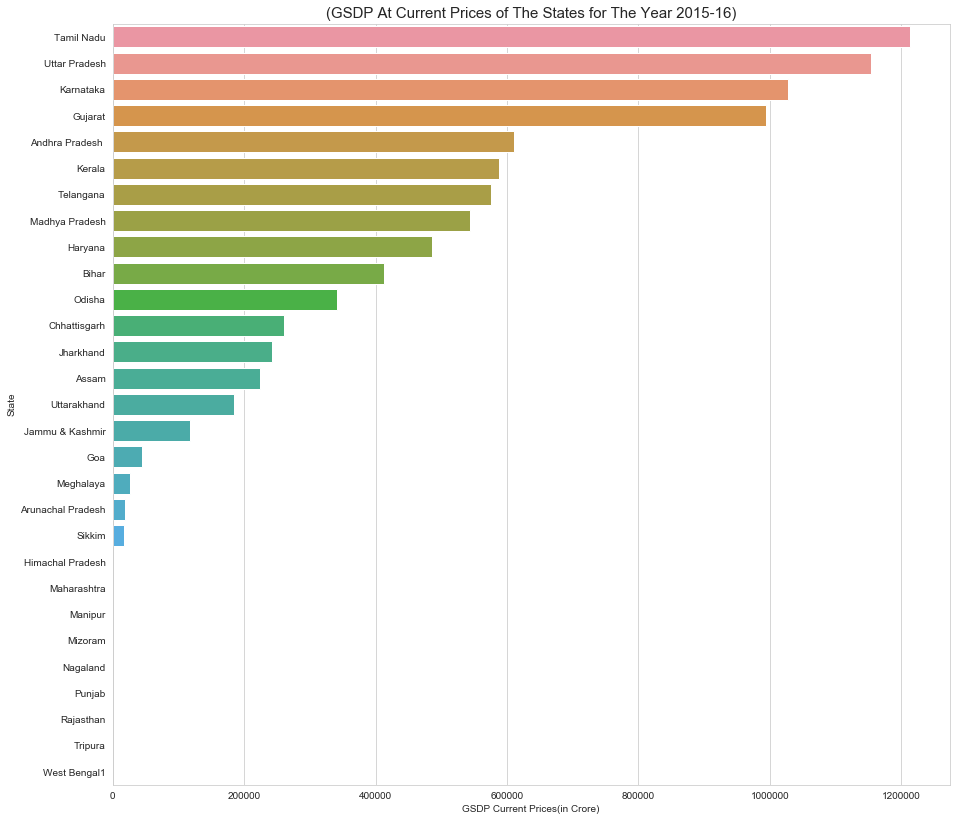

In [7]:
# Plot a graph to show the GDP of all the Indian states for the year 2015-16
plt.figure(figsize = (15, 14))
sns.barplot(x = 'Growth Value', y = 'State', data = df2)
plt.ylabel('State')
plt.xlabel('GSDP Current Prices(in Crore)')
plt.title('(GSDP At Current Prices of The States for The Year 2015-16)', fontsize = 15)
plt.show()

In [8]:
# Get the top 5 states  
df3 = df2.nlargest(5, 'Growth Value')

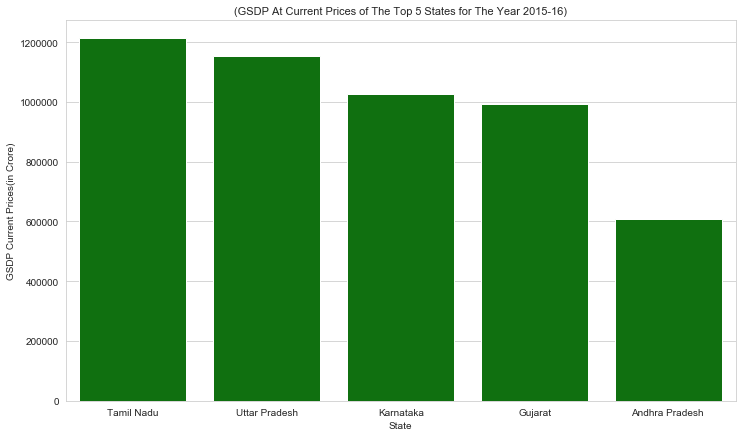

In [9]:
# Plot a graph to show the Total GDP of the top 5 Indian states for the year 2015-16
plt.figure(figsize = (12, 7))
sns.barplot(x = 'State', y = 'Growth Value', color = 'green', data = df3)
plt.xlabel('State')
plt.ylabel('GSDP Current Prices(in Crore)')
plt.title('(GSDP At Current Prices of The Top 5 States for The Year 2015-16)', fontsize = 11)
plt.show()

In [10]:
# Get the bottome 5 states
df4 = df2.nsmallest(5, 'Growth Value')

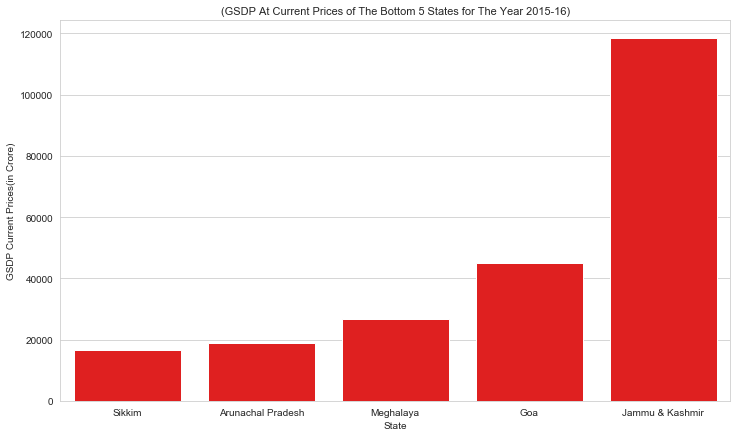

In [11]:
# Plot a graph to show the GDP of the top 5Indian states for the year 2015-16
plt.figure(figsize = (12, 7))
sns.barplot(x = 'State', y = 'Growth Value', color = 'r', data = df4)
plt.xlabel('State')
plt.ylabel('GSDP Current Prices(in Crore)')
plt.title('(GSDP At Current Prices of The Bottom 5 States for The Year 2015-16)', fontsize = 11)
plt.show()

In [12]:

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

Local_Dir_2 = r"C:\DS_Learning\Data_Science_IITB\EDA\GDP_Assignment\GDP_Part_1B"
os.chdir(Local_Dir_2)

# Create a list for the Union Territories of India 
ut_list = ['Delhi', 'Puducherry', 'Chandigarh', 'Andaman & Nicobar Islands', 'Daman & Diu', 'Dadra & Nagra Haveli']

# Create an empty list
df_list = []

# Loop through all the state files, avaialble, in the directory, create a dataframe and append it to the dataframe df_all
for file in pathlib.Path('.').iterdir():
    state = re.sub('(-GSVA_cur).*$', '', str(file).replace('NAD-',''))
    
    # Check if the file/dataset belongs to an UT, if so, do not process it
    if state in ut_list:
        continue
    else:
        df = pd.read_csv(file, usecols = ["S.No.", "Item", "2014-15"], index_col = None, header = 0, encoding='unicode_escape')
        # Transpose the rows into columns
        sectors = df[['S.No.', 'Item']]
        df = df[['Item', '2014-15']]
        df = df.T
        
        # Get the header record
        l_header = df.iloc[0]
        
        # Take the rows other than header
        df = df[1:]
        
        # Assign the new header
        df.columns = l_header
        
        # Create a new column 'State' and assign the name of the state to it
        df['State'] = state
        
        # Append the dataset to the existing list
        df_list.append(df)
        
# Craete a new Dataframe from the list constructed above
df_all = pd.concat(df_list, axis = 0, ignore_index = True, sort = False)
df6 = df_all.loc[:, ['State', 'Per Capita GSDP (Rs.)']]


In [13]:
df6.sort_values('Per Capita GSDP (Rs.)', ascending = False)

,State,Per Capita GSDP (Rs.)
5,Goa,271793
21,Sikkim,240274
7,Haryana,164077
11,Kerala,154778
25,Uttarakhand,153076
13,Maharashtra,152853
8,Himachal_Pradesh,147330
22,Tamil_Nadu,146503
10,Karnataka,145141
6,Gujarat,141263


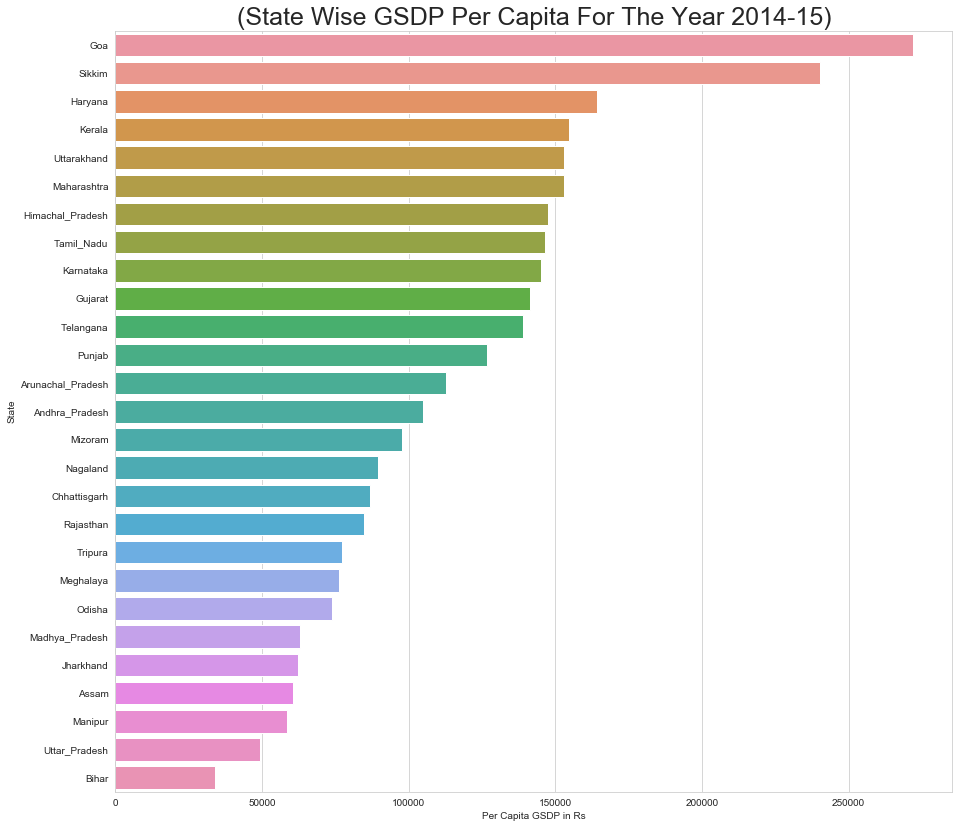

In [14]:
# Plot the GDP per capita for all the states in the descending order

plt.figure(figsize = (15, 14))
sns.barplot(x = 'Per Capita GSDP (Rs.)', y = 'State',  data = df6.sort_values('Per Capita GSDP (Rs.)', ascending = False))
plt.ylabel('State')
plt.xlabel('Per Capita GSDP in Rs')
#plt.xticks(rotation = '90')
plt.title('(State Wise GSDP Per Capita For The Year 2014-15)', fontsize = 25)
plt.show()

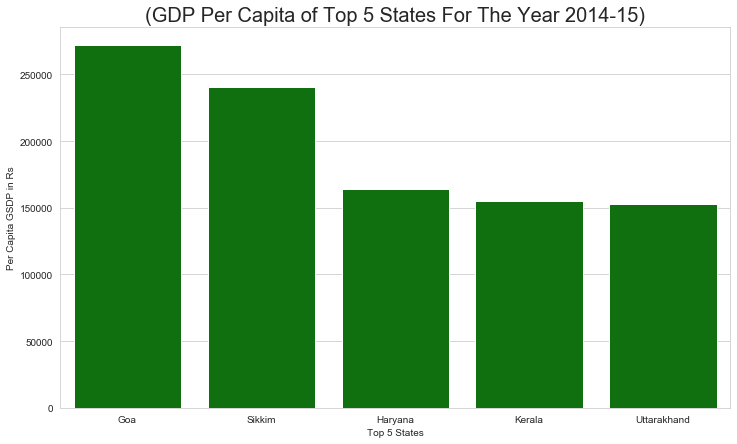

In [15]:
# Plot the GDP per capita for the top 5 sates
plt.figure(figsize = (12, 7))
sns.barplot(y = 'Per Capita GSDP (Rs.)', x = 'State', color='green',  data = df6.sort_values('Per Capita GSDP (Rs.)', ascending = False).head())
plt.xlabel("Top 5 States")
plt.ylabel("Per Capita GSDP in Rs")
plt.title('(GDP Per Capita of Top 5 States For The Year 2014-15)', fontsize = 20)
plt.show()

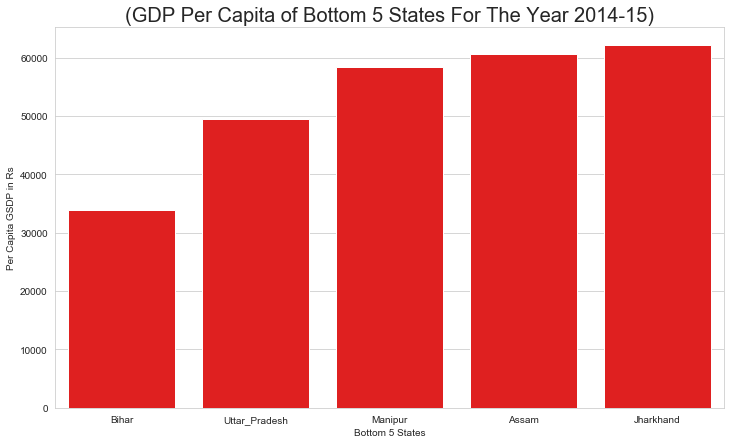

In [16]:
# Plot the GDP per capita for the bottom 5 sates
plt.figure(figsize = (12, 7))
sns.barplot(y = 'Per Capita GSDP (Rs.)', x = 'State', color = 'red',  data = df6.sort_values('Per Capita GSDP (Rs.)').head())
plt.xlabel("Bottom 5 States")
plt.ylabel("Per Capita GSDP in Rs")
plt.title('(GDP Per Capita of Bottom 5 States For The Year 2014-15)', fontsize = 20)
plt.show()

In [17]:
#Find out the ratio of the highest capita GDP to the lowest capita GDP

lratio = round(df_all['Per Capita GSDP (Rs.)'].max()/df_all['Per Capita GSDP (Rs.)'].min(),4)
print("######################################################################################")
print("\tThe ratio of the highest Capita GDP to the lowest GDP is {}".format(lratio))
print("######################################################################################")


######################################################################################
	The ratio of the highest Capita GDP to the lowest GDP is 8.0047
######################################################################################


In [18]:
# Create a new dataframe with the only columns, that required for further analysis
df7 = df_all.loc[:, ['State', 'Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product', 'Per Capita GSDP (Rs.)']]

In [19]:
# Create new cloumns for Primary, Secondary and Tertiary Sectors contribution by taking the percentage over Total GSDP
df7['Pri_Pcent_Contr'] = (df7['Primary']/df7['Gross State Domestic Product']*100).astype(float)
df7['Sec_Pcent_Contr'] = (df7['Secondary']/df7['Gross State Domestic Product']*100).astype(float)
df7['Ter_Pcent_Contr'] = (df7['Tertiary']/df7['Gross State Domestic Product']*100).astype(float)

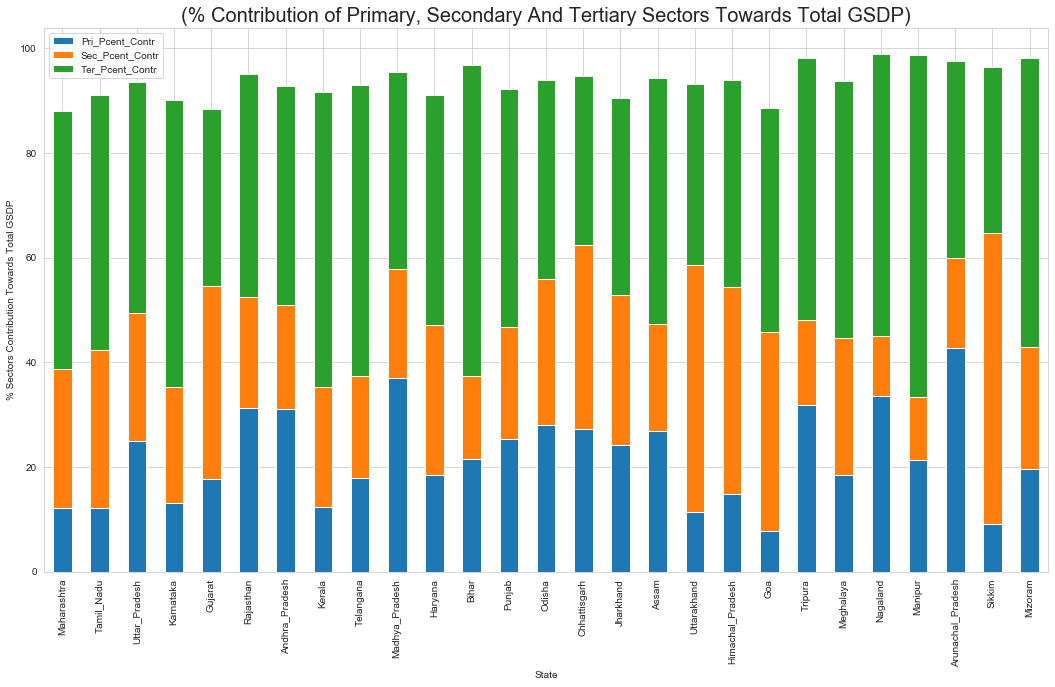

In [20]:
# Plot the graph for the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states
df7.sort_values('Gross State Domestic Product', ascending = False, inplace = True)
df7.plot(kind='bar', x = 'State', y = ['Pri_Pcent_Contr', 'Sec_Pcent_Contr', 'Ter_Pcent_Contr'], stacked=True, figsize=(18, 10))
plt.xlabel('State')
plt.ylabel('% Sectors Contribution Towards Total GSDP')
plt.title('(% Contribution of Primary, Secondary And Tertiary Sectors Towards Total GSDP)', fontsize = 20)
plt.show()

In [21]:
# Create a new DF, that will only have two columns State and Per Capita GSDP
df8 = df_all.loc[:, ['State', 'Per Capita GSDP (Rs.)']]

# Create a list for the quantiles, to be used for analysis 
quan_list = [.20,.50,.85,1]

# Find out the .20, .50, .85 and 1 quantile of the Per Capita GSDP
l_quan = df8['Per Capita GSDP (Rs.)'].quantile(quan_list)

# Print quantiles
l_quan

0.20     65187
0.50    104977
0.85    153246
1.00    271793
Name: Per Capita GSDP (Rs.), dtype: object

In [22]:
# Categorise the states into the 4 categories C1, C2, C3 and C4. C1 will have the states belong to highest GSDP i.e between 85 to 1
# While C4 will have states, belong to lowest quantile i.e between 0 and .20

# Create a new column 'Category' in the main DF "df_all"
df_all['Category'] = df_all['Per Capita GSDP (Rs.)'].apply(lambda x: 'C4' if ((x > 0) & (x <= l_quan.iloc[0])) else 
                                                           ('C3' if((x > l_quan.iloc[0])& (x <= l_quan.iloc[1]))
                                                            else ('C2' if((x > l_quan.iloc[1])& (x <= l_quan.iloc[2]))else 'C1')))

In [23]:
# Create a new column in the existing "Sectors" dataframe, that will store the sub sectors

# Drop the existing index
sectors.reset_index(drop = True, inplace = True)

# Derive the sub sectors from the Item Column and store them in the new column "Sub_Sec"
sectors['Sub_Sec'] = sectors[['S.No.', 'Item']].apply(lambda x: x['Item'] if not re.search("([a-z|\.])", x['S.No.']) else 'NR', axis = 1)

In [24]:
# Filter out the Main Sectors(Primary, Secondary and Tertiary)
# Here NR refers to "Not Required"
sectors = sectors.loc[(sectors.Sub_Sec != 'NR')]

# Filter out the unnecessary rows(such as TOTAL GSVA at basic prices, Taxes on Products, etc ), that have S.NO. as  11, 12 and so on
sectors = sectors.loc[(pd.to_numeric(sectors['S.No.']) <= 11)]

# Convert the series into List and assign it to a new variable "sub_sec_list"
sub_sec_list = sectors['Sub_Sec'].tolist()

In [25]:
# Add the columns 'Gross State Domestic Product' and 'Per Capita GSDP (Rs.)' into the list
col_list = ['Gross State Domestic Product', 'Per Capita GSDP (Rs.)']

# Add the new list "col_list" to existing list 'sub_sec_list'
sub_sec_list.extend(col_list)

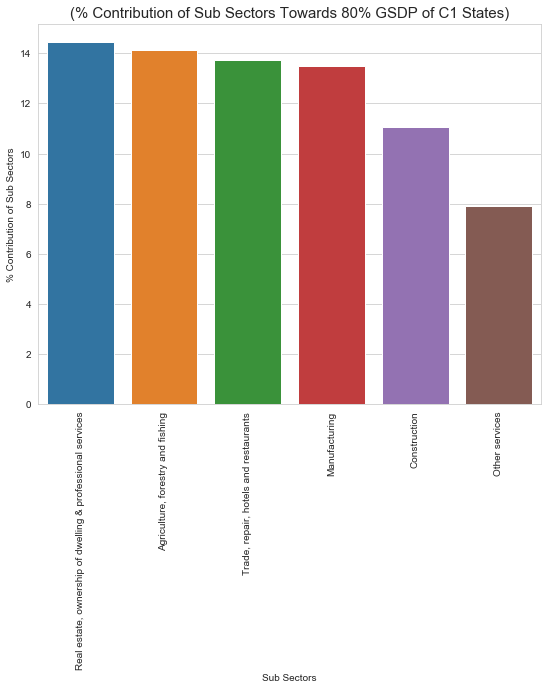

In [26]:
# Create a new Dataframe "df_c1", it will be used to process the data of the states pertaining to "C1" categories
df_c1 = df_all.loc[(df_all['Category'] == 'C1'), sub_sec_list]

# Convert the datatypes of the columns to "Numeric"
df_c1 = df_c1.apply(lambda x: pd.to_numeric(x), axis = 1)

# Create a new row "total", which is the sum of all the rows of the respective sub sectors columns
df_c1.loc['total'] = df_c1.select_dtypes(pd.np.number).sum()

# Create a new Dataframe C1 to store the percentage of aggregated sub sectors towards "GSDP" 
c1 = df_c1.iloc[-1:,:].apply(lambda x: (x/df_c1.iloc[-1:,11])*100)

# Remove the columns, which are no longer required
c1.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)' ],axis = 1, inplace = True)

# Transpose rows into columns and reset index
c1 = c1.T
c1.reset_index(inplace = True)

# Rename the columns and sort the dataframe
c1.columns = ['Sub_Sectors', 'C1_Percent_Contribution']
c1.sort_values('C1_Percent_Contribution', ascending = False, inplace = True)

# Calculate the cumulative sum and fetch only those subsectors, which contributes ~80% to total GSDP
c1 = c1.loc[(c1['C1_Percent_Contribution'].cumsum() <= 80)]

# Plot the graph
plt.figure(figsize = (9,7))
sns.barplot(y = 'C1_Percent_Contribution',  x = 'Sub_Sectors', data = c1)
plt.ylabel('% Contribution of Sub Sectors')
plt.title('(% Contribution of Sub Sectors Towards 80% GSDP of C1 States)', fontsize = 15)
plt.xlabel('Sub Sectors')
plt.xticks(rotation = '90')
plt.show()

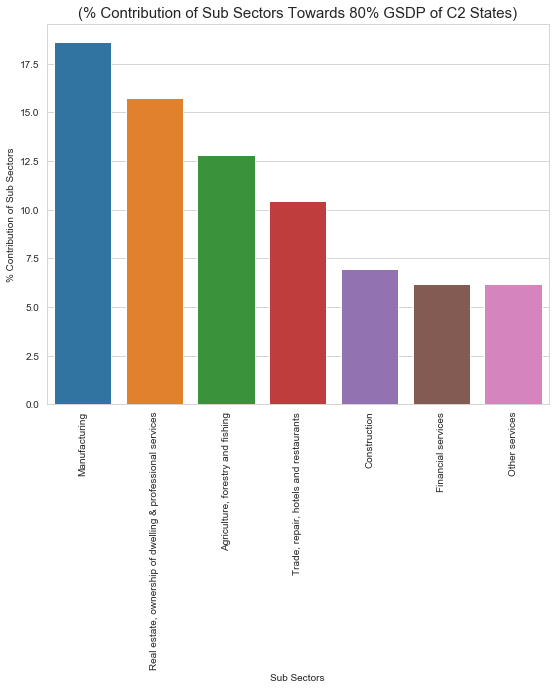

In [27]:
# Create a new Dataframe "df_c2", it will be used to process the data of the states pertaining to "C2" category
df_c2 = df_all.loc[(df_all['Category'] == 'C2'), sub_sec_list]

# Convert the datatypes of the columns to "Numeric"
df_c2 = df_c2.apply(lambda x: pd.to_numeric(x), axis = 1)

# Create a new row "total", which is the sum of all the rows of the respective sub sectors columns
df_c2.loc['total'] = df_c2.select_dtypes(pd.np.number).sum()

# Create a new Dataframe C2 to store the percentage of aggregated sub sectors towards "GSDP" 
c2 = df_c2.iloc[-1:,:].apply(lambda x: (x/df_c2.iloc[-1:,11])*100)

# Remove the columns, which are no longer required
c2.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)' ],axis = 1, inplace = True)

# Transpose rows into columns and reset index
c2 = c2.T
c2.reset_index(inplace = True)

# Rename the columns and sort the dataframe
c2.columns = ['Sub_Sectors', 'C2_Percent_Contribution']
c2.sort_values('C2_Percent_Contribution', ascending = False, inplace = True)

# Calculate the cumulative sum and fetch only those subsectors, which contributes ~80% to total GSDP
c2 = c2.loc[(c2['C2_Percent_Contribution'].cumsum() <= 80)]

# Plot the graph
plt.figure(figsize = (9,7))
sns.barplot(y = 'C2_Percent_Contribution',  x = 'Sub_Sectors', data = c2)
plt.ylabel('% Contribution of Sub Sectors')
plt.xlabel('Sub Sectors')
plt.title('(% Contribution of Sub Sectors Towards 80% GSDP of C2 States)', fontsize = 15)
plt.xticks(rotation = '90')
plt.show()

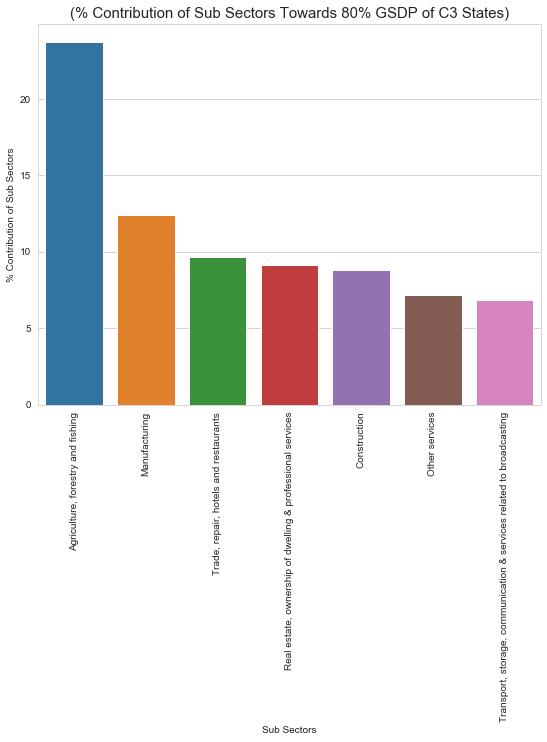

In [28]:
# Create a new Dataframe "df_c3", it will be used to process the data of the states pertaining to "C3" category
df_c3 = df_all.loc[(df_all['Category'] == 'C3'), sub_sec_list]

# Convert the datatypes of the columns to "Numeric"
df_c3 = df_c3.apply(lambda x: pd.to_numeric(x), axis = 1)

# Create a new row "total", which is the sum of all the rows of the respective sub sectors columns
df_c3.loc['total'] = df_c3.select_dtypes(pd.np.number).sum()

# Create a new Dataframe C3 to store the percentage of aggregated sub sectors towards "GSDP" 
c3 = df_c3.iloc[-1:,:].apply(lambda x: (x/df_c3.iloc[-1:,11])*100)

# Remove the columns, which are no longer required
c3.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)' ],axis = 1, inplace = True)

# Transpose rows into columns and reset index
c3 = c3.T
c3.reset_index(inplace = True)

# Rename the columns and sort the dataframe
c3.columns = ['Sub_Sectors', 'C3_Percent_Contribution']
c3.sort_values('C3_Percent_Contribution', ascending = False, inplace = True)

# Calculate the cumulative sum and fetch only those subsectors, which contributes ~80% to total GSDP
c3 = c3.loc[(c3['C3_Percent_Contribution'].cumsum() <= 80)]

# Plot the graph
plt.figure(figsize = (9,7))
sns.barplot(y = 'C3_Percent_Contribution',  x = 'Sub_Sectors', data = c3)
plt.ylabel('% Contribution of Sub Sectors')
plt.xlabel('Sub Sectors')
plt.title('(% Contribution of Sub Sectors Towards 80% GSDP of C3 States)', fontsize = 15)
plt.xticks(rotation = '90')
plt.show()

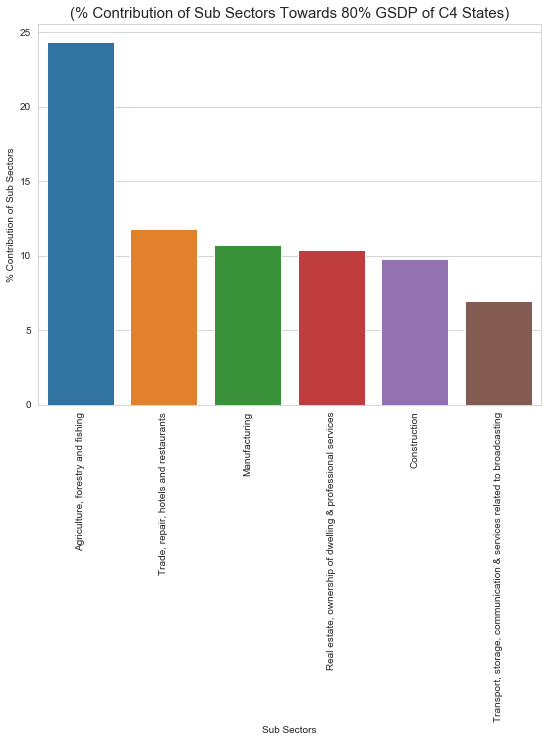

In [29]:
# Create a new Dataframe "df_c4", it will be used to process the data of the states pertaining to "C4" category
df_c4 = df_all.loc[(df_all['Category'] == 'C4'), sub_sec_list]

# Convert the datatypes of the columns to "Numeric"
df_c4 = df_c4.apply(lambda x: pd.to_numeric(x), axis = 1)

# Create a new row "total", which is the sum of all the rows of the respective sub sectors columns
df_c4.loc['total'] = df_c4.select_dtypes(pd.np.number).sum()

# Create a new Dataframe C4 to store the percentage of aggregated sub sectors towards "GSDP" 
c4 = df_c4.iloc[-1:,:].apply(lambda x: (x/df_c4.iloc[-1:,11])*100)

# Remove the columns, which are no longer required
c4.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)' ],axis = 1, inplace = True)

# Transpose rows into columns and reset index
c4 = c4.T
c4.reset_index(inplace = True)

# Rename the columns and sort the dataframe
c4.columns = ['Sub_Sectors', 'C4_Percent_Contribution']
c4.sort_values('C4_Percent_Contribution', ascending = False, inplace = True)

# Calculate the cumulative sum and fetch only those subsectors, which contributes ~80% to total GSDP
c4 = c4.loc[(c4['C4_Percent_Contribution'].cumsum() <= 80)]

# Plot the graph
plt.figure(figsize = (9,7))
sns.barplot(y = 'C4_Percent_Contribution',  x = 'Sub_Sectors', data = c4)
plt.ylabel('% Contribution of Sub Sectors')
plt.xlabel('Sub Sectors')
plt.title('(% Contribution of Sub Sectors Towards 80% GSDP of C4 States)', fontsize = 15)
plt.xticks(rotation = '90')
plt.show()

In [30]:

# Assign the path of the local dir to a variable. This path must be updated, if the notebook is being executed on a different machine.
Local_Dir_3 = r"C:\DS_Learning\Data_Science_IITB\EDA\GDP_Assignment\GDP_Part_2"

# The downloaded file for "Dropout rates" from data.gov.in has been renamed to GDP_Drop_Out.csv.
# The variable GDP_File_2 must be udpated with the name of the dropout file to be used
GDP_File_2 = r"\rs_session243_au570_1.1.csv"
Dropout_Dataset = str(Local_Dir_3 + GDP_File_2)


In [31]:
# Store the list of columns, required for the analysis in the list "drp_col_list"
drp_col_list = ['Level of Education - State', 'Primary - 2014-2015', 'Upper Primary - 2014-2015','Secondary - 2014-2015' ]

# Creata a new Datafeame 'df11' to store the data set of Dropout Rate of each state
df11 = pd.read_csv(Dropout_Dataset, index_col = None)


In [32]:
# The CSV file, downloaded from data.gov.in, has got duplicate columns 'Primary - 2014-2015'.
# Looking into the pattern of the column names in the file, the first instance of duplicate columns should have been
# named to 'Primary - 2013-2014', hence, drop one of them
df11 = df11.drop('Primary - 2014-2015', axis = 1)

# Rename the column name to Primary - 2014-2015 
df11 = df11.rename({'Primary - 2014-2015.1':'Primary - 2014-2015'}, axis = 'columns')

# Get only those columns, which are required for analysis and they are :
# 'Level of Education - State', 'Primary - 2014-2015' and 'Upper Primary - 2014-2015','Secondary - 2014-2015'
df11 = df11.loc[:, drp_col_list]

In [33]:
# As per the analysis done on the CSV file, the name of the states are not in sync with the ones, mentioned in the 
# State Wise GSDP file. Therefore, tate names need to me renamed in order to merge the data sets.
df11['State'] = df11['Level of Education - State'].apply(lambda x: x.replace(' ', '_') if len(x.split()) > 1 else x)

In [34]:
# Rename 'Uttarkhand' to 'Uttarakhand' and 'Chhatisgarh' to 'Chhattisgarh'
df11.reset_index(drop = True, inplace = True)
df11.set_index('State', inplace = True)
df11.rename(index ={'Uttrakhand':'Uttarakhand', 'Chhatisgarh':'Chhattisgarh'}, inplace = True)

# Drop the column 'Level of Education - State', which has become redundant now
df11.drop('Level of Education - State', axis = 1, inplace = True)
df11.reset_index(inplace = True)

In [35]:
# Merge the Dataframe "df6", which contains the Per Capita GDP, with dropout rate datframe "df11"
merged_df = pd.merge(df6, df11, how = 'inner', on = 'State')

In [36]:
# Convert datatype to numeric
merged_df['Per Capita GSDP (Rs.)'] = pd.to_numeric(merged_df['Per Capita GSDP (Rs.)'])

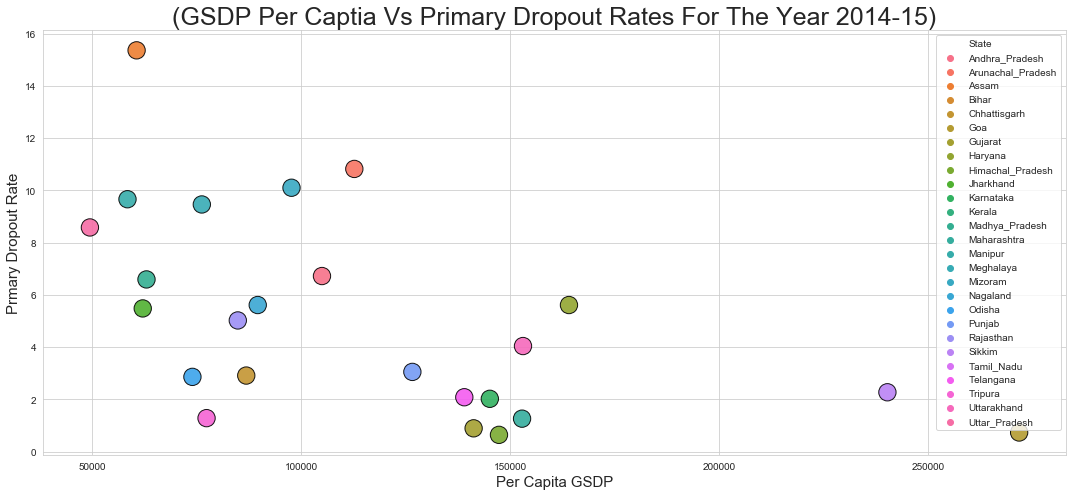

In [37]:
# Plot the graph to compare the GDP per capita of each state and Primary Drop out Rate for the year 2014-15 

plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Per Capita GSDP (Rs.)', y = 'Primary - 2014-2015', hue = 'State'
                , s=300, edgecolor ='black', linewidth =1, alpha = 0.90, data = merged_df)
plt.title('(GSDP Per Captia Vs Primary Dropout Rates For The Year 2014-15)', fontsize = 25)
plt.xlabel('Per Capita GSDP', fontsize = 15)
plt.ylabel('Prmary Dropout Rate', fontsize = 15)
#plt.xticks(rotation = '90')
plt.legend()
plt.tight_layout()
plt.show()

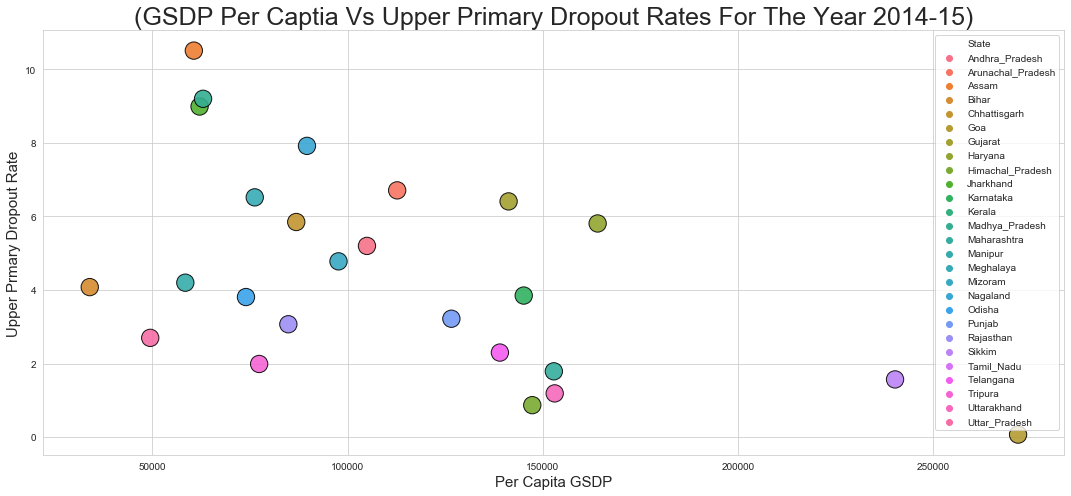

In [38]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Per Capita GSDP (Rs.)', y = 'Upper Primary - 2014-2015', hue = 'State'
                , s=300, edgecolor ='black', linewidth =1, alpha = 0.90, data = merged_df)
plt.title('(GSDP Per Captia Vs Upper Primary Dropout Rates For The Year 2014-15)', fontsize = 25)
plt.xlabel('Per Capita GSDP', fontsize = 15)
plt.ylabel('Upper Prmary Dropout Rate', fontsize = 15)
#plt.xticks(rotation = '90')
plt.legend()
plt.tight_layout()
plt.show()

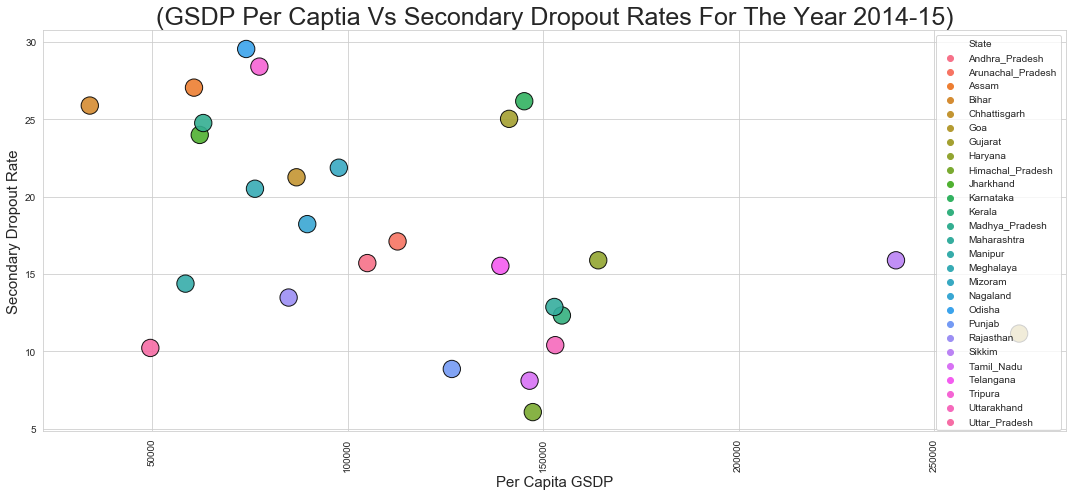

In [39]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Per Capita GSDP (Rs.)', y = 'Secondary - 2014-2015', hue = 'State'
                , s=300, edgecolor ='black', linewidth =1, alpha =0.90, data = merged_df)
plt.title('(GSDP Per Captia Vs Secondary Dropout Rates For The Year 2014-15)', fontsize = 25)
plt.xlabel('Per Capita GSDP', fontsize = 15)
plt.ylabel('Secondary Dropout Rate', fontsize = 15)
plt.xticks(rotation = '90')
plt.legend()
plt.tight_layout()
plt.show()